<a href="https://colab.research.google.com/github/Piya88/Drowsiness_Detection/blob/main/Drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drowsiness Detection


In todays world 21% of accidents are happening due to drowsy driving. sleep related crashes are most common in young people between the ages of 18 and 29. There can be many causes like lack of sleep, tiredness, driving long distance alone may lead to feel drowsiness while driving car.
In this project we will build a Neural network model which will be able to predict if person is drowsy or not.
Drowsiness detection can be used in cars to detect if driver is feeling drowsy while driving car, this will alert the driver and will help to avoid many car accidents.



Let's first import the libraries required to build model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Image preprocessing and Augmentation**

Image preprocessing is used to clean data before used by computer vision model. This makes sure all the image size array are of same size, if your image array size is not equal then computer vision model won't be able to work properly.

Image augmentation is used to improve training dataset by creating different versions of similar contents so that model can have exposure to wide array of training set.
Image augmentation is applied to training dataset only.


Keras ImageDataGenerator helps for Image pre-processing, Augmentation and splitting dataset into train and test datasets.

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)



In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/ImprovementSet',
        target_size=(254, 254),
        batch_size=5755,
        class_mode='binary',
        shuffle=True,
        subset='training',
        seed=42)


Found 5755 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/TestSet',
        target_size=(254, 254),
        batch_size=2116,
        class_mode='binary',
        subset="training",
        shuffle=True,
        seed=42)


valid_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/TestSet',
        target_size=(254, 254),
        batch_size=2116,
        class_mode='binary',
        subset="validation",
        shuffle=True,
        seed=42)




Found 2116 images belonging to 2 classes.
Found 2116 images belonging to 2 classes.


Keras image data generator has extracted the images to directory form. To feed the images to model for training we need to export it as array.

**Exporting Training dataset**

In [ ]:
X, Y = next(train_generator)

x_train = np.array(X)
y_train = np.array(Y)

x_train.shape

(5755, 254, 254, 3)

**Exporting test dataset**

In [ ]:
X, Y = next(test_generator)

x_test = np.array(X)
y_test = np.array(Y)

In [ ]:
x_test.shape

(2116, 254, 254, 3)

**Exporting valid dataset**

In [ ]:
X, Y = next(valid_generator)

x_valid = np.array(X)
y_valid = np.array(Y)

Let's print the images from training dataset.

0.0


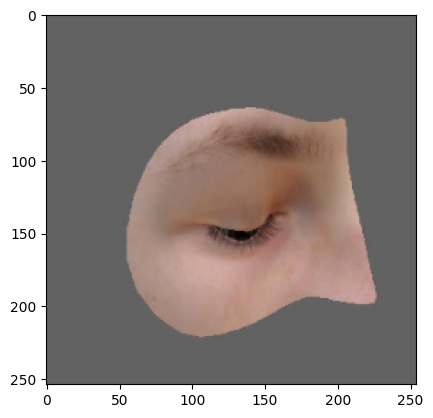

In [ ]:
plt.imshow(x_train[0])

print(y_train[0])

1.0


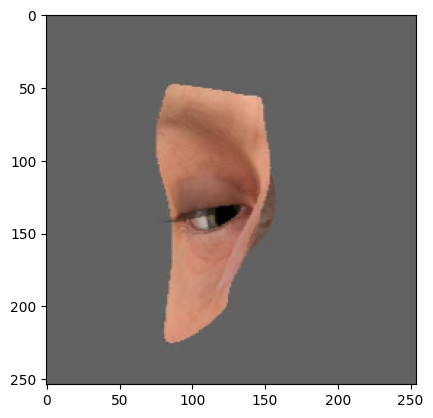

In [ ]:
plt.imshow(x_train[500])

print(y_train[500])

0.0


(-0.5, 253.5, 253.5, -0.5)

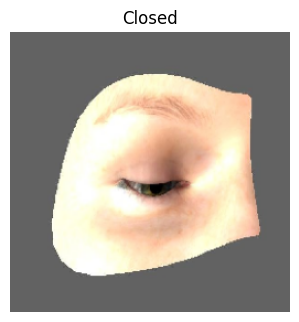

In [ ]:
Eyes = ["Closed", "Opened"]

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
img = x_train[250]
plt.imshow(img)
print(y_train[250])
f = Eyes[(y_train[250]).astype(int)]
plt.title(f)
plt.axis("off")

In [ ]:
print(x_train.shape)

(5755, 254, 254, 3)


**Let's build CNN model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, models

model_eye = models.Sequential([
    layers.Conv2D(filters=254, kernel_size=(3,3), activation='relu',input_shape=(254, 254, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=150, kernel_size=(3,3), activation='relu',input_shape=(254, 254, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=500, kernel_size=(3,3), activation='relu',input_shape=(254, 254, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),

  Dense(units = 100, activation ='relu'),
  Dense(units = 150, activation = 'relu'),
  Dense(units = 1, activation = 'sigmoid')

])

In [ ]:
model_eye.compile(optimizer="adam", loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
valid_set=(x_valid, y_valid)

In [ ]:
model_eye.fit(x_train, y_train, validation_data = valid_set, epochs=20, callbacks=[early_stopping])

Epoch 1/20
180/180 [==============================] - 33s 95ms/step - loss: 0.3817 - accuracy: 0.8261 - val_loss: 0.2105 - val_accuracy: 0.9088
Epoch 2/20
180/180 [==============================] - 12s 67ms/step - loss: 0.1708 - accuracy: 0.9340 - val_loss: 0.1416 - val_accuracy: 0.9499
Epoch 3/20
180/180 [==============================] - 12s 67ms/step - loss: 0.1487 - accuracy: 0.9447 - val_loss: 0.2428 - val_accuracy: 0.8837
Epoch 4/20
180/180 [==============================] - 12s 67ms/step - loss: 0.1344 - accuracy: 0.9522 - val_loss: 0.2234 - val_accuracy: 0.9031
Epoch 5/20
180/180 [==============================] - 12s 67ms/step - loss: 0.1158 - accuracy: 0.9567 - val_loss: 0.1514 - val_accuracy: 0.9423


In [ ]:
train_acc = model_eye.evaluate(x_train, y_train)
print("Train data accuracy= ", train_acc)

180/180 [==============================] - 5s 28ms/step - loss: 0.0949 - accuracy: 0.9687
Train data accuracy=  [0.09493022412061691, 0.9687228202819824]


In [ ]:
y_train_pred = model_eye.predict(x_train)
print(y_train_pred[1])
y_p = [np.argmax(i) for i in y_train_pred]

180/180 [==============================] - 5s 26ms/step
[0.7148338]


In [ ]:
p_pred = y_train_pred.flatten()
print(p_pred.round(0))

[0. 1. 1. ... 1. 1. 0.]


[0 1 1 ... 1 1 0]


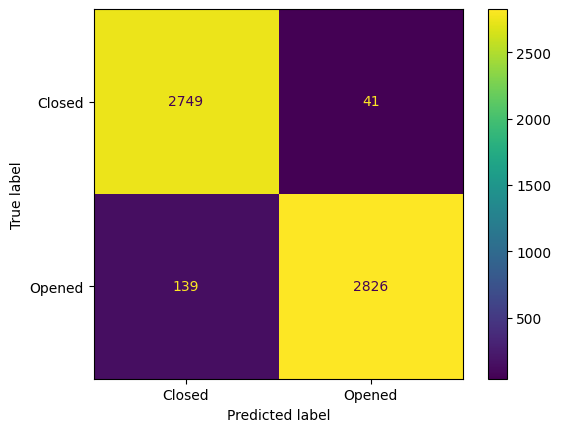

In [ ]:
from sklearn import metrics

# p_pred = model.predict(X_test)
y_train_pred = p_pred.round(0)
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Closed", "Opened"])

cm_display.plot()
plt.show()

In [ ]:
y_test_p = model_eye.predict(x_test)
print(y_pred[1])
y_p = [np.argmax(i) for i in y_pred]

67/67 [==============================] - 2s 26ms/step
1


In [ ]:
p_test_p = y_test_p.flatten()
print(p_pred.round(0))
y_test_p = p_test_p.round(0)

[0. 1. 1. ... 1. 1. 0.]


In [ ]:
test_acc = model_eye.evaluate(x_test, y_test)
print("Test data accuracy= ", test_acc)

67/67 [==============================] - 2s 28ms/step - loss: 0.1482 - accuracy: 0.9400
Test data accuracy=  [0.14824676513671875, 0.9399811029434204]


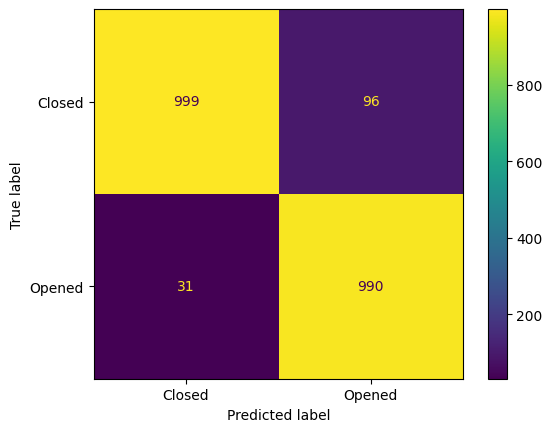

In [ ]:
from sklearn import metrics



confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_p)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = ["Closed", "Opened"])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'Opened')

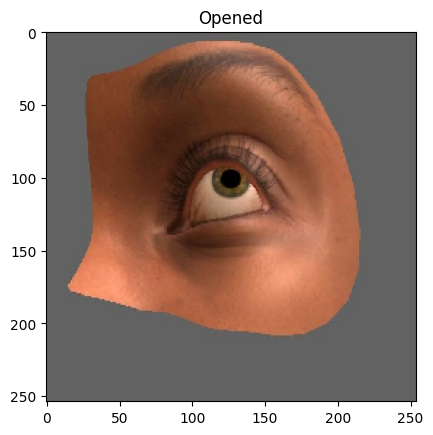

In [ ]:


# showing image
plt.imshow(x_test[950])

plt.title(Eyes[int(y_test_p[950])])



Text(0.5, 1.0, 'Closed')

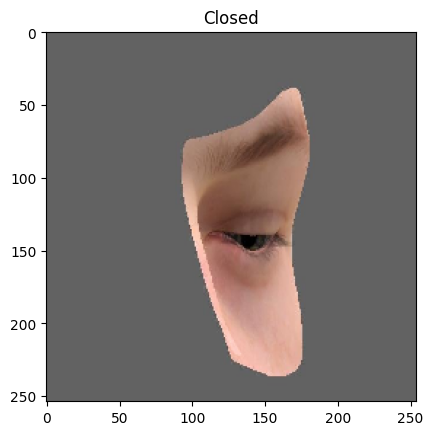

In [ ]:
plt.imshow(x_test[35])

plt.title(Eyes[int(y_test_p[35])])